# Introduction

At IMDB, where I work as a data scientist, it's critical that we have a categorization system so that we can understand how viewers evaluate and appreciate their movies. We can participate in the movie rating and suggestion systems, among other things, which will benefit us.

Therefore, in my capacity as a data scientist, I have undertaken the duty of reading through the reviews that people have left and categorizing their attitudes as either good or unfavorable. 


## Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image as PILImage
import base64, io, IPython


## Dataset
There are 50,000 reviews in total.
Because reviews for the same movie sometimes have associated ratings, there aren't more than 30 reviews for any one film in the entire collection.

Importing the dataset

In [2]:
df = pd.read_csv("/Users/amulya/Downloads/aclImdb 3/IMDB Dataset.csv")

Since my computer doesn't have enough RAM to train the enitre dataset, I will be using 50% of the original dataset

In [3]:
df = df[25000:]

New dataset

In [4]:
df

,review,sentiment
25000,This movie was bad from the start. The only pu...,negative
25001,"God, I never felt so insulted in my whole life...",negative
25002,Not being a fan of the Coen Brothers or George...,positive
25003,The movie Andaz Apna Apna in my books is the t...,positive
25004,I have to say I was really looking forward on ...,negative
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Data Exploration

Let's check what are the different types of sentiments that we have to deal with

In [5]:
df["sentiment"].unique()

array(['negative', 'positive'], dtype=object)

Total number of positive and negative reviews

In [6]:
df["sentiment"].value_counts()

positive    12526
negative    12474
Name: sentiment, dtype: int64

<AxesSubplot: title={'center': 'Movie Reviews'}>

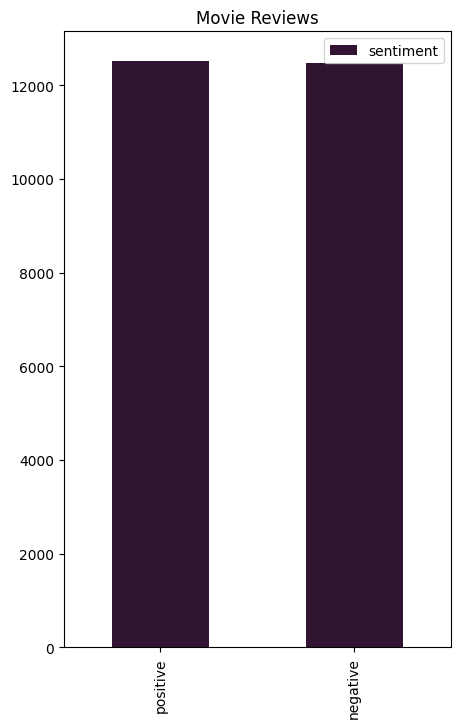

In [7]:

total = pd.DataFrame(df["sentiment"].value_counts())

total.plot(kind="bar",color='#311432',title='Movie Reviews',figsize=(5,8))

## Preprocessing of the Dataset
Tokenising of data: The first step in the NLP process is tokenization, which turns sentences into comprehensible pieces of data that a computer can use.

In [8]:
tokenizer = nltk.RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

## Stemming of data

For handling big dimensions, a computer system may need a lot of memory. To solve this issue, a space where words with related meanings are grouped and represented by the same vector can be developed.

In [9]:
stemm = nltk.stem.porter.PorterStemmer()

Here I am converting every word to lowercase and applying tokenization and stemming the dataset

In [10]:
def preprocess(text):
    text = text.lower()
    text = tokenizer.tokenize(text)
    stem_text = [stemm.stem(w) for w in text]
    final_text = " ".join(stem_text)
    return final_text
a = 0
for i in df['review']:
    #print(i)
    obj = preprocess(i)
    df["review"][a] = obj
    a = a+1

New datatframe

In [11]:
df

,review,sentiment
25000,This movie was bad from the start. The only pu...,negative
25001,"God, I never felt so insulted in my whole life...",negative
25002,Not being a fan of the Coen Brothers or George...,positive
25003,The movie Andaz Apna Apna in my books is the t...,positive
25004,I have to say I was really looking forward on ...,negative
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Splitting of the dataframe

In [12]:
x = df["review"]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Here I will vectorise the dataset. 
Text data is transformed into numerical vectors using a technique known as vectorization or word embedding. Later, several machine learning models are constructed using those vectors. 

I have made sure the stop word are also removed along with removal of accents. (Additional preprocessing steps)

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(2,2),min_df=3,strip_accents="ascii",stop_words='english')


Vectorise the training dataset

In [14]:
new_X_train = vectorizer.fit_transform(X_train).toarray()
vectorizer.get_feature_names_out()


array(['000 00', '000 000', '000 budget', ..., 'zorro fighting',
       'zorro really', 'zucker brothers'], dtype=object)

## Classification

We can try multiple classification algorithms to find the best one

In [15]:
model1 = RandomForestClassifier(max_depth=10, criterion="gini" , n_estimators=150)
model2 = KNeighborsClassifier(n_neighbors=5, algorithm="auto")
model3 = LogisticRegression(max_iter=1000)

Fitting the data

Using Ensemble Learning - Random Forest to classify the data

In [16]:
model1.fit(new_X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

Using KNN to classify the data

In [17]:
model2.fit(new_X_train,y_train)

KNeighborsClassifier()

Using a linear model- Logistic Regression to classify the model

In [18]:
model3.fit(new_X_train,y_train)

LogisticRegression(max_iter=1000)

## Transform the test dataset respectively

In [19]:
new_X_test = vectorizer.transform(X_test).toarray()

Now I will check for the accuracies of the various algorithms.

Accuracy for Random Forest

In [21]:
y_predict1 = model1.predict(new_X_test)

In [22]:
acc1 = accuracy_score(y_predict1,y_test)
acc1

0.7522

Accuracy for KNN

In [28]:
y_predict2 = model2.predict(new_X_test)
acc2 = accuracy_score(y_predict2,y_test)
acc2

0.66

Accuracy for Logistic Regression

In [29]:
y_predict3 = model3.predict(new_X_test)
acc3 = accuracy_score(y_predict3,y_test)
acc3


0.8454

Logistic Regression has performed the best. Lets visualise the confusion matrix 

In [33]:
matrix = confusion_matrix(y_test,y_predict3)

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model3.classes_)

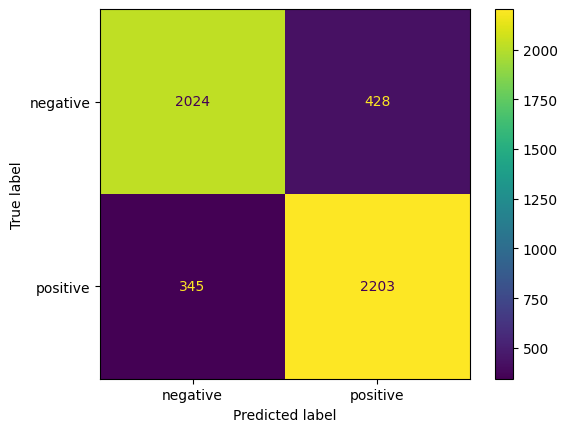

In [38]:
disp.plot()
plt.show()
